In [1]:
from processing_functions import *
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")


In [2]:
# reading datasets
personal_data = pd.read_csv('./dataset/Ovarian/ovar_data_mar22_d032222.csv')
screen_data = pd.read_csv('./dataset/Ovarian/Screening/ovar_screen_data_mar22_d032222.csv')
screen_abnorm_data = pd.read_csv('./dataset/Ovarian/Screening Abnormalities/ovar_scrsub_data_mar22_d032222.csv')

## Preprocessing
For some of the datasets we determined some of the features to not be useful for analysis. For every dataset that includes `build` features. 

For personal dataset we removed all `ovar_` features since they are a direct result of the cancer diagnosis and should not be used predict cancer. 

For the screen data dataset it was determined that `examinerid_` features do not bring the value to the dataset since they represet 'Examiner ID made by concatentating center and exam ID for overall screen result.' and cannot be the cause of the cancer. We also drop all of the remaining

In [3]:
# Drop profy features
proxy_features_personal_dataset = [
    'fstcan_exitdays', # Days from trial entry (randomization) to first cancer diagnosis for participants with cancer, or to trial exit otherwise. Only cancers occuring during the trial are used to determine exit.
    'fstcan_exitstat', # Status of the participant at exit for first cancer incidence. Only cancers occuring during the trial are used to determine exit.
    'fstcan_exitage',
    'f_dthovar', # Is ovarian cancer the underlying cause of death? This conclusion is based on the information from the death certificate and death review.
    'f_codeath_cat', # Categorized underlying cause of death.
    'f_cancersite', # Underlying cause of death from cancer.
    'f_seer_death', # Underlying cause of death.
    'd_codeath_cat', # Categorized underlying cause of death.
    'd_dthovar', # Is Ovarian Cancer The Underlying Cause Of Death?
    'd_cancersite', # 
    'd_seer_death', # Underlying cause of death.
    'ph_ovar_muq', # Did the participant have a personal history of ovarian/ft/pt cancer prior to MUQ analysis entry? 
    'ph_ovar_sqx', # 
    'entrydays_muq', # 
    'ph_ovar_dhq', # 
    'dth_days', # 
    'bq_compdays',
    'bq_adminm',
    'bq_returned',
    'ssmokea_f',
    'orem_fyro',
    'arm',
    'sex',
    'rndyear',
    ]

proxy_features_screen_dataset = [
    'QAMETHOD',
    'tvudays_pvis1',
    'tvudays_pvis2',
    'tvudays_pvis3',
    # 'tvures_qvis1',
    # 'tvures_qvis2',
    # 'tvures_qvis3',
    # 'tvures_pvis3',  # It is completely missing for non-cancer patients
    'tvu_days',
    'tvu_assess_days_q',
    'medcomp', # 
    'physid',
    'detl_q',
    'detr_q',
    'ca125_src', # 
    'ca125_days', # 
    'ca125ii_src', # '
    'ca125_level',
    'ca125i_assess_days',
    'ca125ii_assess_days',
]

proxy_features_abnorm_dataset = ['VISIT', 'side', 'sbcd', 'source']

personal_data = personal_data.drop(proxy_features_personal_dataset, axis=1)
screen_data = screen_data.drop(proxy_features_screen_dataset, axis=1)
screen_abnorm_data = screen_abnorm_data.drop(proxy_features_abnorm_dataset, axis=1)

# Remove all ovar_ features
personal_data = remove_featues_startswith(personal_data, ['ovar_', 'mortality', 'reconsent', 'is_dead', 'build', 'biopolink', 'ca125_', 'tvu', 'entrydays', 
                                                          'entryage'
                                                          ], ['ovar_cancer', 'ovar_cancer_diagdays'])

# Remove all inad_ and examinerid_ and build_ features
screen_data = remove_featues_startswith(screen_data, ['inad_', 'examinerid', 'build', 'tvures_'])

# Drop not useful cols and convert categorical into numerical in screen abnormalities
screen_abnorm_data = remove_featues_startswith(screen_abnorm_data, ['build'])

Number of ovar_ cols: 50
['ovar_reasfoll', 'ovar_reassurv', 'ovar_reassymp', 'ovar_reasoth', 'ovar_cancer', 'ovar_intstat_cat', 'ovar_annyr', 'ovar_cancer_site', 'ovar_stage', 'ovar_stage_7e', 'ovar_stage_t', 'ovar_stage_n', 'ovar_stage_m', 'ovar_clinstage', 'ovar_clinstage_7e', 'ovar_clinstage_t', 'ovar_clinstage_n', 'ovar_clinstage_m', 'ovar_pathstage', 'ovar_pathstage_7e', 'ovar_pathstage_t', 'ovar_pathstage_n', 'ovar_pathstage_m', 'ovar_grade', 'ovar_topography', 'ovar_morphology', 'ovar_behavior', 'ovar_histtype', 'ovar_exitstat', 'ovar_exitage', 'ovar_seer', 'ovar_cancer_first', 'ovar_curative_surg', 'ovar_curative_chemo', 'ovar_primary_trt', 'ovar_num_heslide_imgs', 'ovar_has_deliv_heslide_img', 'ovar_exitdays', 'ovar_primary_trt_days', 'ovar_cancer_diagdays', 'ovar_mra_stat0', 'ovar_mra_stat1', 'ovar_mra_stat2', 'ovar_mra_stat3', 'ovar_mra_stat4', 'ovar_mra_stat5', 'ovar_eligible_bq', 'ovar_eligible_sqx', 'ovar_eligible_dhq', 'ovar_eligible_dqx']
Number of mortality cols: 3
['m

In [4]:
print_records_vs_unique(personal_data, 'plco_id', 'personal')
# Check the number of people with cancer
personal_data_cancer = personal_data[personal_data['ovar_cancer']==1]
print(f"Num of patients with cancer: {len(personal_data_cancer)}")
# Check the number of people without cancer
personal_data_no_cancer = personal_data[personal_data['ovar_cancer']==0]
print(f"Num of patients without cancer: {len(personal_data_no_cancer)}")

Num of records in personal dataset: 78209
Num of unique plco_id in personal dataset: 78209
Num of patients with cancer: 613
Num of patients without cancer: 77596


In [5]:
screen_abnorm_data.columns

Index(['study_yr', 'solid', 'sepst', 'cyst', 'cystw', 'echo', 'maxdi', 'volum',
       'plco_id'],
      dtype='object')

In [6]:
# Convert discrete float columns to floats with lower number of bytes
personal_data = convert_numeric_to_float16(personal_data)
screen_data = convert_numeric_to_float16(screen_data)
screen_abnorm_data = convert_numeric_to_float16(screen_abnorm_data)

## Merging data into features and mean imputing

Deciding which patients will be in training vs test set to learn the mean imputation parameters.

Mean imputation: https://www.kaggle.com/general/226554

To predict whether person will get cancer in the next 1, 3, 5, 10 years we need to determine what feature describes when person got cancer. In our case that features is `ovar_cancer_diagdays`. We are going to use that feature in the following manner: we are going to have a sliding window to determine whether the person gets cancer withing the period of that window. Then, we are going to slide that window by one year and determine a new batch of people who are going to get cancer in that window and so on. For each of the features that are measured across multiple years we only going to use a record that is at the beginning of the interval. 

Since `ovar_cancer_diagdays` is described in days and we are concerned about the years when people will get cancer we need to convert this feature into years. Since people got cancer from year 1 to year 19, we are going to bucket it into 19 buckets corresponding to year when person got cancer. 

In [7]:
ovar_cancer_diagdays_range = personal_data['ovar_cancer_diagdays'].max() / 365
print(f'Max value of ovar_cancer_diagdays in years is {ovar_cancer_diagdays_range}')


Max value of ovar_cancer_diagdays in years is 18.893150684931506


In [8]:
personal_data['ovar_cancer_years'] = pd.cut(personal_data['ovar_cancer_diagdays'], bins=19, labels=list(range(0, 19)), include_lowest=True)
personal_data['ovar_cancer_years'] = pd.to_numeric(personal_data['ovar_cancer_years'])

We can also set every healthy persons '`ovar_cancer_years`' to 100 so that it is easier to filter them

In [9]:
personal_data['ovar_cancer_years'] = personal_data['ovar_cancer_years'].fillna(100)

When merging abnormalities dataset we are going to keep each record for each `study_yr`, select the latest `VISIT` if there are multiple and take the largest value of each column over all of the remaining records. 

See below what I found about CA125 vs CA125ii......it sounds like we should actually just be using CA125ii.  When they switched tests, they actually used the new test (CA125ii) to re-test the frozen samples from all of the patients who had the original test.  So CA125ii should be present for all patients who had testing, and CA125 is only left in as a variable for a perspective on what patients were initially told at that time.


So I think that the only variable we need to use for this tumor marker is ca125ii_level0-5, which is from the ovary person dataset, and we can disregard values for ca125_level0-5.


CA-125 ASSAYS, VERSIONS 1 AND 2 

When the trial began, PLCO used the first version of the assay for all CA-125 exams. On October 1, 1995, CA-125II became available and the protocol was switched to use this for all subsequent screens. A few years after this transition, all of the original samples were re-assayed using version two. So, use CA125_LEVEL0-5 to get the result of a screen from a clinical perspective of what the participant was told following their screening visit. Use CA125II_LEVEL0-5 to get the result of a screen from an epidemiologic perspective, with all values coming from the same assay. 


Since ca125ii only present in the personal dataset, I only kept the feature that describes the level of ca125ii for a year that is a baseline year (for the windown when they got cancer) of people when merging data.


`TODO:` some features in the person dataset represent observations over multiple years

`TODO:` bucket age by 3 or 5 years

In [10]:
personal_filtered = personal_data.drop(['ovar_cancer_diagdays'], axis=1)
merged_df = merge_data_over_years(personal_filtered, screen_data, screen_abnorm_data, screen_join='left', abrorm_join='left')
merged_df = merged_df.drop(['study_yr'], axis=1)

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643704 entries, 0 to 78208
Columns: 171 entries, ovar_cancer to cancer_in_next_10_years
dtypes: float16(164), float64(5), int64(1), object(1)
memory usage: 240.6+ MB


In [12]:
# Convert discrete float columns to floats with lower number of bytes
# Maybe discretise some
# merged_summary = summarize_features(merged_df)
# cols_unique_under_90 = merged_summary[merged_summary['unique count'] < 90].index
# merged_df[cols_unique_under_90] = merged_df[cols_unique_under_90].astype(np.float16)

In [13]:
# Drop features that are 100% missing
# merged_df = drop_cols_missing_percentage(100, merged_df, 'merged_df')

In [14]:
# get_cols_missing_percentage(50, merged_df, 'imputed_df', show_missing=True)

## Merging Datasets

`TODO:` should we dismiss people who do not have records in screen dataset. Abnormalities dataset? Run tests on all of the combinations of merges and imputations? 

I realized that I was doing labeled mean imputation, which should not happen. So, I performed imputation after I merged cancer and no_cancer datasets back together. Without labeled mean imputation, gaussian NB and logistic regression do not perform well. 

run experiments with decision tree and remove the top feature every time. Store the depth of the tree, the efficacy of the top feature, its value, accuracy, confusion matrix

https://stackoverflow.com/questions/62819569/how-to-return-the-features-that-used-in-decision-tree-that-created-by-decisiontr

`TODO:` Run model purely on family history variables vs purely on screen variables. 

`TODO:` cross validation for the whole dataset

In [15]:
def decision_tree_feature_selection(classifier, fn, accuracy, plot_tree=False, filepath='./trees/decision_tree.png'):
    
    if plot_tree:
        cn=['no cancer', 'cancer']
        fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=3000)
        tree.plot_tree(classifier,
                       max_depth=5,
            feature_names = fn, 
            class_names=cn,
            filled = True)
        plt.savefig(filepath)
        # plt.show()
    feature_importances = pd.DataFrame(classifier.feature_importances_,
                        index = fn,
                        columns=['importance']).sort_values('importance', 
                                                            ascending=False)
    feature_importances['feature'] = feature_importances.index
    feature_importances = feature_importances[['feature', 'importance']]
    # TODO: boundary and confusion matrix
    top_feature_stats = {
        'top_feature': feature_importances.iloc[0]['feature'],
        # 'boundary': 0,
        'num_features_used': len(feature_importances[feature_importances['importance'] > 0]),
        'importance': round(feature_importances.iloc[0]['importance'], 3),
        'tree_depth': classifier.tree_.max_depth,
        'accuracy': accuracy,
        # 'precision': precision,
        # 'recall':    recall,
        # 'f1-score':  f1,
    }
    return top_feature_stats, feature_importances


In [16]:
def get_cv_scores(classifier, k_fold_lambdas):
    cv_scores = []
    # pipeline = make_pipeline(StandardScaler(), classifier)
    for k, k_fold_lambda in enumerate(k_fold_lambdas):
        X_train, X_test, y_train, y_test = k_fold_lambda()
        # pipeline.fit(X_train_cv, y_train_cv)
        # score = pipeline.score(X_test_cv, y_test_cv)
        auc, accuracy, report = run_classifier(classifier, X_train, X_test, y_train, y_test, show_graph=False)
        cv_scores.append(report)
        # print(f'Fold: {k+1}, Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}, Auc: {auc:.3f}')
    cv_scores = pd.concat(cv_scores)
    cv_scores = cv_scores.reset_index()
    measures_df = cv_scores.describe().T[['mean', 'std', 'min', 'max']]
    print('\n\nCross-Validation measures:')
    print_df(measures_df)
    return cv_scores, measures_df


In [17]:
def run_classifiers(classifiers, df, label, drop_n_features = 1, k=10, cv=False, plot_tree=False):
    df_feature_importance_tree = None
    df_top_feature_importances = []
    for i in range(drop_n_features):
        
        train_test_lambda, k_fold_lambdas = process_and_impute_for_label_kfold(df, label, 'median', n_max_per_class=10000, k=k)
        X_train, X_test, y_train, y_test = train_test_lambda()
        auc_dict = {}
        accuracy_dict = {}
        top_feature_importance = []
        for classifier_type, classifier in classifiers.items():
            # Cross Validation
            if cv:
                cv_scores, measures_df = get_cv_scores(classifier, k_fold_lambdas)
                cv_scores.to_csv(f'./cv_scores/cv_scores_for_{label}.csv')
                measures_df.to_csv(f'./cv_scores/cv_stats_for_{label}.csv')

            # Test classifier
            print(classifier_type)
            auc, accuracy, report = run_classifier(classifier, X_train, X_test, y_train, y_test)

            # Decision Tree feature selection
            if classifier_type == 'DecisionTreeClassifier':
                fn=X_train.columns
                top_feature_stats, feature_importances = decision_tree_feature_selection(classifier, fn, accuracy, plot_tree=plot_tree,
                                                                                         filepath=f'./trees/decision_tree_for_{label}.png')
                df_top_feature_importances.append(top_feature_stats)
                top_feature_importance.append(feature_importances.iloc[0]['feature'])
                feature_importances = feature_importances[feature_importances['importance'] > 0]
                if df_feature_importance_tree is not None:
                    df_feature_importance_tree = df_feature_importance_tree.merge(feature_importances, on='feature', how='outer', suffixes=[f'_tiral_{i}', f'_tiral_{i+1}'])
                else:
                    df_feature_importance_tree = feature_importances
            auc_dict[classifier_type] = auc
            accuracy_dict[classifier_type] = accuracy
        df = df.drop(top_feature_importance, axis=1)

    return df_top_feature_importances, df_feature_importance_tree



Distribution of labels based on unique plco_id: 0.17455138662316477
Distribution of labels based on duplicate plco_id: 0.20573801434503586


Cross-Validation measures:
+--------------------+----------+-----------+----------+----------+
|                    |     mean |       std |      min |      max |
|--------------------+----------+-----------+----------+----------|
| index              | 0        | 0         | 0        | 0        |
| precision__class_0 | 0.901114 | 0.015244  | 0.876663 | 0.92278  |
| recall__class_0    | 0.913625 | 0.0119816 | 0.89625  | 0.93     |
| f1-score__class_0  | 0.907242 | 0.0102073 | 0.891211 | 0.921167 |
| precision__class_1 | 0.912477 | 0.0111626 | 0.89638  | 0.928389 |
| recall__class_1    | 0.8995   | 0.0170498 | 0.8725   | 0.925    |
| f1-score__class_1  | 0.905855 | 0.0110673 | 0.887476 | 0.920076 |
| accuracy           | 0.906562 | 0.0105912 | 0.889375 | 0.920625 |
| auc                | 0.907516 | 0.0109922 | 0.889199 | 0.921767 |
+---------------

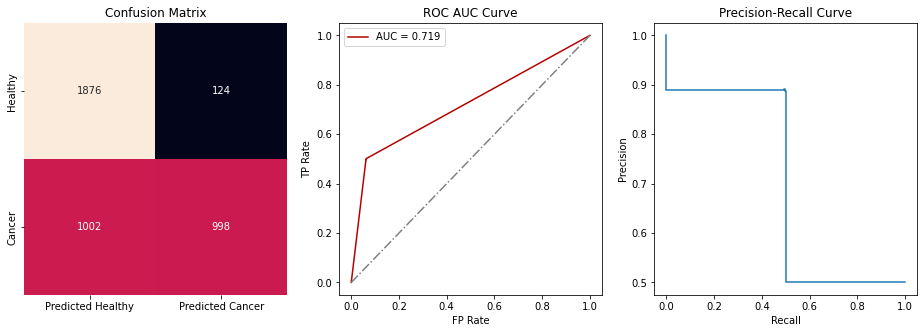

+----+---------------+---------------------+--------------+--------------+------------+
|    | top_feature   |   num_features_used |   importance |   tree_depth |   accuracy |
|----+---------------+---------------------+--------------+--------------+------------|
|  0 | bmi_curr      |                 106 |        0.049 |           41 |     0.7185 |
+----+---------------+---------------------+--------------+--------------+------------+


In [27]:
classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy'),
    # 'RandomForestClassifier': RandomForestClassifier(criterion= 'gini', n_estimators= 200),
    # 'XGBClassifier': XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
}
years = [10]
drop_n_features = 1
cv=True
for year in years:
    label = f'cancer_in_next_{year}_years' # 'cancer_in_next_10_years', 'ovar_cancer'
    df_top_feature_importances, df_feature_importance_tree = run_classifiers(classifiers, merged_df, label, cv=cv, drop_n_features = drop_n_features, k=10, plot_tree=True)
    # print_df(df_feature_importance_tree)
    df_feature_importance_tree.to_csv(f'./feature_importance/feature_importance_for_cancer_in_{year}__{drop_n_features}_trials.csv')
    print_df(pd.DataFrame(df_top_feature_importances))
    pd.DataFrame(df_top_feature_importances).to_csv(f'./top_{drop_n_features}_features_decision_tree_for__cancer_in_{label}.csv')


`TODO:` make spreadsheet with model performance for 1,3,5,10 years. Print out trees, top 5 features. Send models

In [19]:
df_feature_importance_mean = df_feature_importance_tree.drop('feature', axis=1)
df_feature_importance_mean = df_feature_importance_mean.T
df_feature_importance_mean.columns = df_feature_importance_tree['feature']
df_feature_importance_mean = df_feature_importance_mean.astype('float')
df_feature_importance_mean_describe = df_feature_importance_mean.describe().T
df_feature_importance_mean_describe.sort_values('mean', ascending=False, inplace=True)
# print(df_feature_importance_mean_describe.columns)
df_feature_importance_mean_describe = df_feature_importance_mean_describe[['count', 'mean']]
print_df(df_feature_importance_mean_describe)
df_feature_importance_mean_describe.to_csv(f'./feature_importance/feature_importance_mean_for_cancer_in_{year}__{drop_n_features}_trials.csv')

+---------------------+---------+-------------+
| feature             |   count |        mean |
|---------------------+---------+-------------|
| bmi_curr            |       1 | 0.0535974   |
| bmi_50              |       1 | 0.051167    |
| bmi_20              |       1 | 0.0467513   |
| ph_any_muq          |       1 | 0.0466375   |
| bq_age              |       1 | 0.0418974   |
| weight_f            |       1 | 0.0343958   |
| ph_any_sqx          |       1 | 0.0343399   |
| ph_any_trial        |       1 | 0.0342249   |
| ph_any_dhq          |       1 | 0.028242    |
| cig_stop            |       1 | 0.0255096   |
| brothers            |       1 | 0.0240127   |
| weight20_f          |       1 | 0.0231401   |
| center              |       1 | 0.0221243   |
| weight50_f          |       1 | 0.0201485   |
| smokea_f            |       1 | 0.0197403   |
| cig_years           |       1 | 0.0185162   |
| thorm               |       1 | 0.0181154   |
| breast_fh_age       |       1 | 0.0172

In [20]:
set(merged_df.columns) - set(df_feature_importance_mean_describe.index)

{'bmi_20c',
 'bronchit_f',
 'ca125_result',
 'cancer_in_next_10_years',
 'cancer_in_next_1_years',
 'cancer_in_next_3_years',
 'cancer_in_next_5_years',
 'cigar',
 'cyst',
 'cystw',
 'detl_p',
 'detr_p',
 'echo',
 'hispanic_f',
 'lantero_q',
 'llong_p',
 'llong_q',
 'ltran_p',
 'ltran_q',
 'lvol_p',
 'lvol_q',
 'numcyst',
 'numcystl',
 'numcystr',
 'ovar_cancer',
 'ovar_cancer_years',
 'ovar_days',
 'ovar_result',
 'ovarsumm_fh_cnt',
 'ovary_diam',
 'ovary_diaml',
 'ovary_volr',
 'ovcyst_diamr',
 'ovcyst_morph',
 'ovcyst_morphl',
 'ovcyst_morphr',
 'ovcyst_outline',
 'ovcyst_outlinel',
 'ovcyst_outliner',
 'ovcyst_solid',
 'ovcyst_solidl',
 'ovcyst_solidr',
 'ovcyst_suml',
 'ovcyst_sumr',
 'ovcyst_vol',
 'ovcyst_voll',
 'ph_ovar_bq',
 'ph_ovar_dqx',
 'ph_ovar_trial',
 'pipe',
 'plco_id',
 'post_menopausal',
 'preg_f',
 'rantero_p',
 'rantero_q',
 'rlong_p',
 'rlong_q',
 'rtran_p',
 'rtran_q',
 'rvol_p',
 'rvol_q',
 'sepst',
 'smoked_f',
 'solid',
 'stroke_f',
 'tubal',
 'visboth',
 'vi

In [21]:
ranked_df = df_feature_importance_tree.rank(method='max')
ranked_df['feature'] = df_feature_importance_tree['feature']
ranked_df = ranked_df.drop('feature', axis=1)
ranked_df = ranked_df.T
ranked_df.columns = df_feature_importance_tree['feature']
ranked_df = ranked_df.astype('float')
description_rank = ranked_df.describe().T
description_rank.to_csv(f'./feature_importance_rank_{drop_n_features}_trials.csv')

In [22]:

# Prints the table of missing values with columns for df filtered for each of the values of on_col
def df_missing_val_distribution_over_col(df, on_col, cutoff_percentage, title, show_missing=True):
    iterate_over_on_col = sorted(df[on_col].unique())
    suffixes=[]
    # since get_cols_missing_percentage will produce columns with the same names, we want to create suffixes to differentiate over on_col values
    for on_col_val in iterate_over_on_col:
        suffixes.append(f'_{on_col}_{on_col_val}')
    # We are going to merge all of the 
    df_missing = None
    for on_col_val in iterate_over_on_col:

        df_on_col = df[df[on_col] == on_col_val]

        df_missing_on_col = get_cols_missing_percentage(cutoff_percentage, df_on_col, f'{title} with {on_col}_{on_col_val}', show_missing=show_missing)
        
        if df_missing is not None:
            df_missing = df_missing.merge(df_missing_on_col, on='column_name', how='inner', suffixes=suffixes)
        else:
            df_missing = df_missing_on_col
    print_df(df_missing)


def df_filter_val_distribution(sourse_df, on_col, make_unique_over_cols, name, hist=True, cutoff_percentage=0):
    unique_vals_list = [sorted(sourse_df[make_unique_over_col].unique()) for make_unique_over_col in make_unique_over_cols]
    unique_combinations_col_vals = get_unique_combinations(unique_vals_list)
    num_records, num_unique = print_records_vs_unique(sourse_df, 'plco_id', name)
    unique_combinations_col_vals = sorted(unique_combinations_col_vals)
    unique_records = [{} for _ in range(len(unique_combinations_col_vals)+1)]
    unique_records[0] = {
            'filtered_on': f'{name} total'
        }
    
    iterate_over_on_col = sorted(sourse_df[on_col].unique())
    for on_col_val in iterate_over_on_col:
        num_records, num_unique = print_records_vs_unique(sourse_df[sourse_df[on_col] == on_col_val], 'plco_id', f'{name} with {on_col}_{on_col_val}')
        unique_records[0][f'num_records_{on_col}:{on_col_val}'] = num_records
        unique_records[0][f'num_unique_id_{on_col}:{on_col_val}'] = num_unique
    print()
    print()
    for j in range(len(unique_combinations_col_vals)):
        unique_combination = unique_combinations_col_vals[j]
        filter = True
        filtered_on = ''
        for i in range(len(make_unique_over_cols)):
            variable_col = make_unique_over_cols[i]
            val = unique_combination[i]
            filter = filter & (sourse_df[variable_col] == val)
            filtered_on += f'{variable_col}: {val} '
        df = sourse_df[filter]
        if len(make_unique_over_cols) > 0:
            df = df.drop(make_unique_over_cols, axis=1)

        title = f'{name} filtered on {filtered_on}'
        print(title)

        df_missing = None
        unique_records[j+1]['filtered_on'] = title
        for on_col_val in iterate_over_on_col:
            df_on_col = df[df[on_col] == on_col_val]
            num_records, num_unique = print_records_vs_unique(df_on_col, 'plco_id', f'{title} with {on_col}_{on_col_val}')
            df_missing_on_col = get_cols_missing_percentage(cutoff_percentage, df_on_col, f'{title} with {on_col}_{on_col_val}')
            unique_records[j+1][f'num_records_{on_col}:{on_col_val}'] = num_records
            unique_records[j+1][f'num_unique_id_{on_col}:{on_col_val}'] = num_unique
            if hist:
                fig, ax = plt.subplots(1, 1, figsize=(20,15))
                df.hist(ax=ax, bins=30)
                plt.show()
        df_missing_val_distribution_over_col(df, on_col, cutoff_percentage, title, show_missing=False)
        df = impute_with_val(df, df.columns, -1)
        print('\n\n')
    print_df(pd.DataFrame(unique_records).sort_values('filtered_on'))

def df_filter_val_distribution_on_cancer(source_df, make_unique_over_cols, name, hist=False, cutoff_percentage=0):
    df_cancer = source_df[source_df['plco_id'].isin(personal_data_cancer['plco_id'])]
    df_cancer['cancer'] = 1
    df_no_cancer = source_df[source_df['plco_id'].isin(personal_data_no_cancer['plco_id'])]
    df_no_cancer['cancer'] = 0
    df = pd.concat([df_cancer, df_no_cancer], axis=0)
    df_filter_val_distribution(df, 'cancer', make_unique_over_cols, name, hist=hist, cutoff_percentage=cutoff_percentage)
make_unique_over_cols = ['dummy']
df = merged_df
df['dummy'] = 0
df_filter_val_distribution_on_cancer(df, make_unique_over_cols, 'Personal Data', hist=False, cutoff_percentage=0)

Num of records in Personal Data dataset: 643704
Num of unique plco_id in Personal Data dataset: 78209
Num of records in Personal Data with cancer_0 dataset: 640215
Num of unique plco_id in Personal Data with cancer_0 dataset: 77596
Num of records in Personal Data with cancer_1 dataset: 3489
Num of unique plco_id in Personal Data with cancer_1 dataset: 613


Personal Data filtered on dummy: 0 
Num of records in Personal Data filtered on dummy: 0  with cancer_0 dataset: 640215
Num of unique plco_id in Personal Data filtered on dummy: 0  with cancer_0 dataset: 77596
172 columns were over 0 missing. This is the list of columns: ['ovar_cancer', 'cancer_in_next_1_years', 'ovar_cancer_years', 'in_TGWAS_population', 'dual', 'agelevel', 'age', 'center', 'ph_ovar_trial', 'ph_any_trial', 'race7', 'cancer', 'plco_id', 'ovary_trial_flag', 'menstrs_stat_type', 'post_menopausal', 'bq_age', 'ph_any_bq', 'ph_ovar_bq', 'smoked_f', 'cig_stat', 'ovariesr_f', 'preg_f', 'usound_history', 'pelvic_history', '

In [23]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    # GaussianNB(),
    # XGBClassifier(),
    # LogisticRegression(max_iter=200)
]
# Calculate years before cancer
def f_score(X_train, X_test, y_train, y_test, classifiers):
    for clf in classifiers:
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")
# f_score(X_train, X_test, y_train, y_test, classifiers)

In [24]:
def select_using_model(x,y):
    sel = SelectFromModel(XGBClassifier())
    sel.fit(x,y)

In [25]:
def select_using_score_func(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # what are scores for the features
    features_scores = pd.DataFrame(x.columns)
    features_scores['scores'] = fs.scores_
    features_scores = features_scores.sort_values('scores', ascending=False)
    features_scores.to_csv('./feature_selection/all_features_new_cols__mean_imputed.csv')

In [26]:
# Determine on which features to use mean imputation and on which ones to replace with -1

 The initial dataset had 181 variables (Appendix 1). Variables were ranked by their F-score, which is the harmonic mean of precision and recall, with those with an F-score closest to 1.0 demonstrating high correlation with treatment success [10]. Experts in the treatment of BPH also selected variables for inclusion into the models irrespective of the F-Score, these variables, plus those with a high F-Score were selected for inclusion in initial model development.. The actual variables used by our models were a subset of these, and the number in any given fold and subgroup was dynamically determined by treating this as a hyper-parameter and tuning it as described below.